<h1><center>Linear Regression</center></h1>

The goal of this tutorial is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. It is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.




### By the end of this tutorial, you’ll have learned:

   - What linear regression is
   - Linear Regression Explanation
   - How to implement linear regression in Python, step by step

### Regression

Regression analysis is one of the most areas in the field of machine learning and statistics. There are many type of regression analysis like logistic regression, linear regression, polynomial regression etc.
For this tutorial we'll be focusing on Linear Regression.

#### What is Regression?

To simply explain, regression is finding a relationship among variables.

For Example. You have some data related to houses and their prices. Now, each house has some features like number of rooms, floors, area etc. Based on these features prices of the houses vary. 

The problem of predicting prices of the houses based on these features is known as a regression problem. Because the price is somehow related to these features described above. In regression analysis you have a number of observations. Each observation has some features. By an assumption that some features are dependant upon others we try to establish a relationship among them.

In other words, for a given problem you need to map some features or variable to other.

Commonly the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.

### Linear Regression

Linear regression is one of the most important and widely used regression techniques for predictive analysis. It’s among the some of the simplest regression methods. One of its main advantages is the ease with which we can interpret resuslts.

#### Explanation

To put simply what we try to do in Linear regression is that we try to fit a straight line on data such that it fits the data best. The equation for linear regression can be presented as Y = mX + c. Here X is the independent variable (inputs) and Y is the dependent variable (outputs) of the model. m and c are the slope and intercept of the line which will try to fit the data.
Think about the individual axes: the Y variable always plots the “dependent” variable, so in our example, that would be the prices. The X variable is the independent variable, which in our case are the features of houses. 

We want to plot how much of the variation in the Y variable can be explained by variation in the X variable.

![title](https://media.geeksforgeeks.org/wp-content/uploads/python-linear-regression-1.png)

On this data we will try to fit the line. Which best describes the reationship between the two variables X and Y.
![title](https://media.geeksforgeeks.org/wp-content/uploads/python-linear-regression-2.png)

### Implementation using Python

These are some of the essential libraries that are needed to use some built-in functionalities provided by python. Some well-known libraries
are like Numpy, Matplotlib, pickle etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 18,14

##### Dataset
We'll be using scaled down version of Boston housing data for this tutorial.

##### Loading dataset
Pickle is a standard Python library that handles serialization - that is, a way to take variables that are otherwise stored in memory, and output them in a format that can be stored to a file and read from later.
pickle.load() is a method to load pickle files. 

We'll also convert our data from 2-D into 1-D using resize function provided by numpy

In [2]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))

##### Plotting the data

Here we will be using Matplotlib's scatter plot to plot our training and testing data

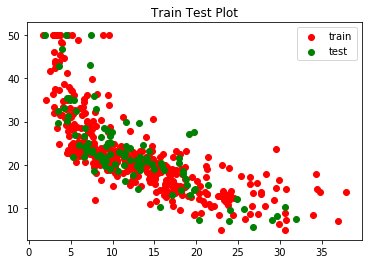

In [3]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
plt.title('Train Test Plot')
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', label='test')
plt.legend()
plt.show()

Now, we can see how the data is distributed we an move forward and compute m and c which are slope and intercept of the line fitting the data. We'll start with the training data. 
First, we'll find mean of x_train and y_train
Then we will find the value of m and c by given formula.

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/944e96221f03e99dbd57290c328b205b0f04c803)

In [4]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
_m = np.sum((x_train - x_mean) * (y_train - y_mean)) / np.sum((x_train - x_mean) ** 2)
_c = y_mean - (_m * x_mean)
print('\nThe value of m and c is:', _m,',', _c)


The value of m and c is: -0.9278216902292561 , 34.216255712624125


##### We can find predictions by y = mx + c

In [5]:
'''Getting predictions on Training data'''
y_pred = (_m * x_train) + _c

##### Mean Squared Error

We also need to find the error between our predicted values and the original values. We'll be using MSE error for this purpose.
![title](https://miro.medium.com/max/880/1*20m_U-H6EIcxlN2k07Z7oQ.png)

In [6]:
'''
Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted) 
where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
'''
def mean_squared_error(y_actual, y_predicted):
    mse = (np.sum((y_actual - y_predicted) ** 2)) / len(y_actual)
    return mse

Computing MSE between predicted y and actual y

In [7]:
'''
Compute mean square error from line using training data i.e. training error.
'''
err = mean_squared_error(y_train, y_pred)
print('MSE from line using Training data is:', err)

MSE from line using Training data is: 39.42905636385886


##### Getting predictions of Test data

In [8]:
'''Getting predictions on Test data'''
y_pred_test = (_m * x_test) + _c

In [9]:
'''
Compute mean square error from line using test data i.e. test error.
'''
test_err = mean_squared_error(y_test, y_pred_test)
print('MSE from line using Test data is:', test_err)

MSE from line using Test data is: 34.87619673683119


We can use plt.plot() to plot the regression line on the data

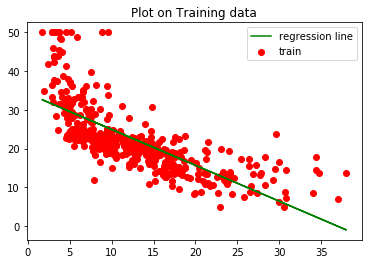

In [10]:
'''
Plot regression line on training data
'''
plt.title('Plot on Training data')
plt.scatter(x_train, y_train, c='r', label='train')
plt.plot(x_train, y_pred, color='g', label='regression line')
plt.legend()
plt.show()

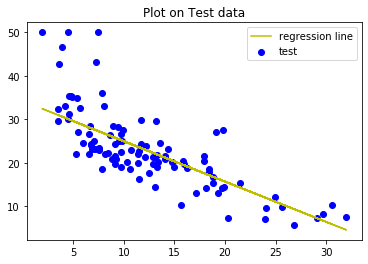

In [11]:
'''
Plot regression line on Testing data
'''
plt.title('Plot on Test data')
plt.scatter(x_test, y_test, c='b', label='test')
plt.plot(x_test, y_pred_test, color='y', label='regression line')
plt.legend()
plt.show()